# Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import gc
import time
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")
from contextlib import contextmanager
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
from numpy import mean
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, cross_validate
from lightgbm import LGBMClassifier
from collections import Counter

In [2]:
# chargement du fichier pickle
df = pd.read_pickle(r"C:\Users\vassalr\OneDrive - STMicroelectronics\Documents\Robin\DataScience\Dataset\Projet7\home-credit-default-risk\dataset_pickled.pkl")
selected_feature_list=['PREV_CODE_REJECT_REASON_HC_MEAN', 'EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'REFUSED_APP_CREDIT_PERC_MIN', 'REFUSED_AMT_CREDIT_MAX', 'PREV_PRODUCT_COMBINATION_POS mobile with interest_MEAN', 'PREV_NAME_YIELD_GROUP_low_normal_MEAN', 'PREV_NAME_YIELD_GROUP_low_action_MEAN', 'PREV_NAME_YIELD_GROUP_high_MEAN', 'PREV_NAME_YIELD_GROUP_XNA_MEAN', 'PREV_NAME_SELLER_INDUSTRY_Connectivity_MEAN', 'PREV_NAME_PRODUCT_TYPE_walk-in_MEAN', 'PREV_NAME_PAYMENT_TYPE_XNA_MEAN', 'PREV_NAME_CONTRACT_TYPE_Revolving loans_MEAN', 'PREV_NAME_CONTRACT_STATUS_Refused_MEAN', 'PREV_NAME_CONTRACT_STATUS_Approved_MEAN', 'PREV_DAYS_DECISION_MIN', 'PREV_CODE_REJECT_REASON_XAP_MEAN', 'PREV_CODE_REJECT_REASON_SCOFR_MEAN', 'PREV_CNT_PAYMENT_SUM', 'INSTAL_DAYS_ENTRY_PAYMENT_SUM', 'DAYS_EMPLOYED_PERC', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 'CODE_GENDER', 'CC_CNT_DRAWINGS_CURRENT_MEAN', 'CC_CNT_DRAWINGS_ATM_CURRENT_MEAN', 'BURO_DAYS_CREDIT_MIN', 'BURO_DAYS_CREDIT_MEAN', 'BURO_CREDIT_ACTIVE_Closed_MEAN', 'BURO_CREDIT_ACTIVE_Active_MEAN', 'APPROVED_DAYS_DECISION_MIN', 'APPROVED_APP_CREDIT_PERC_MAX', 'APPROVED_AMT_ANNUITY_MAX', 'AMT_GOODS_PRICE', 'ACTIVE_DAYS_CREDIT_MAX', 'WALLSMATERIAL_MODE_Panel', 'REG_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_LIVE_CITY', 'REGION_POPULATION_RELATIVE', 'REFUSED_CNT_PAYMENT_SUM', 'REFUSED_CNT_PAYMENT_MEAN', 'PREV_PRODUCT_COMBINATION_POS industry with interest_MEAN', 'PREV_PRODUCT_COMBINATION_POS household without interest_MEAN', 'PREV_PRODUCT_COMBINATION_Cash X-Sell: low_MEAN', 'PREV_PRODUCT_COMBINATION_Card Street_MEAN', 'PREV_NAME_PORTFOLIO_Cards_MEAN', 'PREV_NAME_PAYMENT_TYPE_Cash through the bank_MEAN', 'PREV_NAME_GOODS_CATEGORY_Mobile_MEAN', 'PREV_HOUR_APPR_PROCESS_START_MIN', 'PREV_HOUR_APPR_PROCESS_START_MEAN', 'PREV_HOUR_APPR_PROCESS_START_MAX', 'PREV_CNT_PAYMENT_MEAN', 'PREV_CHANNEL_TYPE_Stone_MEAN', 'PREV_AMT_DOWN_PAYMENT_MIN', 'PREV_AMT_ANNUITY_MEAN', 'POS_MONTHS_BALANCE_SIZE', 'POS_COUNT', 'OCCUPATION_TYPE_Laborers', 'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Secondary / secondary special', 'NAME_EDUCATION_TYPE_Higher education', 'LIVINGAREA_AVG', 'INSTAL_PAYMENT_DIFF_SUM', 'INSTAL_PAYMENT_DIFF_MEAN', 'INSTAL_PAYMENT_DIFF_MAX', 'INSTAL_DBD_SUM', 'INSTAL_DBD_MEAN', 'INSTAL_DBD_MAX', 'INSTAL_DAYS_ENTRY_PAYMENT_MAX', 'INSTAL_AMT_PAYMENT_MIN', 'INCOME_PER_PERSON', 'INCOME_CREDIT_PERC', 'HOUSETYPE_MODE_block of flats', 'FLOORSMAX_MODE', 'FLOORSMAX_AVG', 'FLAG_DOCUMENT_3', 'EMERGENCYSTATE_MODE_No', 'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'CLOSED_MONTHS_BALANCE_SIZE_SUM', 'CLOSED_DAYS_CREDIT_ENDDATE_MAX', 'CLOSED_AMT_CREDIT_SUM_SUM', 'CC_MONTHS_BALANCE_MEAN', 'CC_CNT_DRAWINGS_CURRENT_MAX', 'CC_CNT_DRAWINGS_ATM_CURRENT_VAR', 'CC_CNT_DRAWINGS_ATM_CURRENT_MAX', 'CC_AMT_RECIVABLE_MEAN', 'CC_AMT_DRAWINGS_ATM_CURRENT_SUM', 'CC_AMT_DRAWINGS_ATM_CURRENT_MEAN', 'CC_AMT_CREDIT_LIMIT_ACTUAL_MEAN', 'CC_AMT_BALANCE_MEAN', 'BURO_MONTHS_BALANCE_SIZE_SUM', 'BURO_MONTHS_BALANCE_SIZE_MEAN', 'BURO_MONTHS_BALANCE_MIN_MIN', 'BURO_DAYS_CREDIT_UPDATE_MEAN', 'BURO_DAYS_CREDIT_MAX', 'BURO_DAYS_CREDIT_ENDDATE_MIN', 'BURO_CREDIT_TYPE_Car loan_MEAN', 'APPROVED_HOUR_APPR_PROCESS_START_MEAN', 'APPROVED_HOUR_APPR_PROCESS_START_MAX', 'APPROVED_CNT_PAYMENT_MEAN', 'APPROVED_APP_CREDIT_PERC_MEAN', 'APPROVED_AMT_DOWN_PAYMENT_MIN', 'APPROVED_AMT_DOWN_PAYMENT_MEAN', 'APPROVED_AMT_DOWN_PAYMENT_MAX', 'APPROVED_AMT_CREDIT_MAX', 'APPROVED_AMT_ANNUITY_MEAN', 'ANNUITY_INCOME_PERC', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'ACTIVE_MONTHS_BALANCE_SIZE_MEAN', 'ACTIVE_DAYS_CREDIT_MEAN', 'ACTIVE_DAYS_CREDIT_ENDDATE_MAX', 'ACTIVE_AMT_CREDIT_SUM_SUM', 'ACTIVE_AMT_CREDIT_SUM_LIMIT_SUM', 'ACTIVE_AMT_CREDIT_SUM_LIMIT_MEAN', 'ACTIVE_AMT_CREDIT_MAX_OVERDUE_MEAN']

In [3]:
lite_df = df[selected_feature_list]
lite_df.shape

(307507, 122)

In [4]:
# on rajoute target
lite_df["TARGET"] = df["TARGET"]

# Corrélations - Pearson

In [5]:
# Find correlations with the target and sort
correlations = lite_df.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 ACTIVE_DAYS_CREDIT_MEAN                   0.064041
BURO_DAYS_CREDIT_UPDATE_MEAN              0.068929
BURO_MONTHS_BALANCE_MIN_MIN               0.073225
DAYS_EMPLOYED                             0.074957
BURO_DAYS_CREDIT_MIN                      0.075248
BURO_CREDIT_ACTIVE_Active_MEAN            0.077356
PREV_NAME_CONTRACT_STATUS_Refused_MEAN    0.077681
DAYS_BIRTH                                0.078242
CC_CNT_DRAWINGS_CURRENT_MEAN              0.082520
CC_AMT_RECIVABLE_MEAN                     0.086478
CC_AMT_BALANCE_MEAN                       0.087177
BURO_DAYS_CREDIT_MEAN                     0.089731
CC_CNT_DRAWINGS_CURRENT_MAX               0.101389
CC_CNT_DRAWINGS_ATM_CURRENT_MEAN          0.107692
TARGET                                    1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                              -0.178926
EXT_SOURCE_2                              -0.160471
EXT_SOURCE_1                              -

En valeur positive on retrouve CC_CNT_DRAWINGS_CURRENT_MEAN, CC_AMT_RECIVABLE_MEAN, CC_AMT_BALANCE_MEAN        BURO_DAYS_CREDIT_MEAN, CC_CNT_DRAWINGS_CURRENT_MAX, CC_CNT_DRAWINGS_ATM_CURRENT_MEAN.
Qui correspondent à des features bancaires, orientées métiers : 
- Nombre moyen de retraits au distributeur automatique de billets par mois sur le crédit précédent,
- Nombre maximum de prélèvements effectués par mois sur le crédit précédent,
- Combien de jours avant la demande actuelle le client a-t-il fait une demande de crédit auprès du Credit Bureau ?
- Solde moyen pendant le mois du crédit précédent
- Montant moyen à recevoir pour le crédit précédent
- Nombre moyen de prélèvements effectués par mois sur le crédit précédent

---------------
Moins orienté métier et plus accessible on a l'age du client via DAYS BIRTH

- Let's take a look at some of more significant correlations: the DAYS_BIRTH is the most positive correlation. (except for TARGET because the correlation of a variable with itself is always 1!) 
- Looking at the documentation, DAYS_BIRTH is the age in days of the client at the time of the loan in negative days (for whatever reason!). 
- The correlation is positive, but the value of this feature is actually negative, meaning that as the client gets older, they are less likely to default on their loan (ie the target == 0). That's a little confusing, so we will take the absolute value of the feature and then the correlation will be negative.

## Effet de l'âge dans le remboursement

In [6]:
# Find the correlation of the positive days since birth and target
lite_df['DAYS_BIRTH'] = abs(lite_df['DAYS_BIRTH'])
lite_df['DAYS_BIRTH'].corr(lite_df['TARGET'])

-0.07824216003619373

Plus les clients vieillissent, plus ils ont tendance à rembourser leurs prêts à temps.

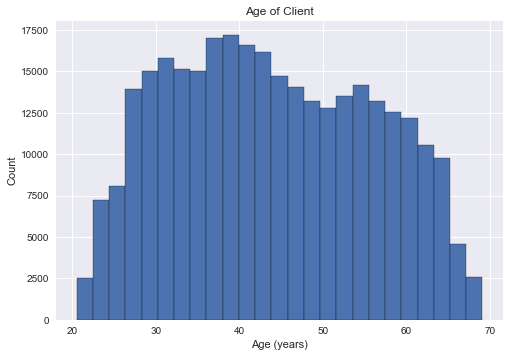

In [7]:
# Set the style of plots
plt.style.use('seaborn')

# Plot the distribution of ages in years
plt.hist(lite_df['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

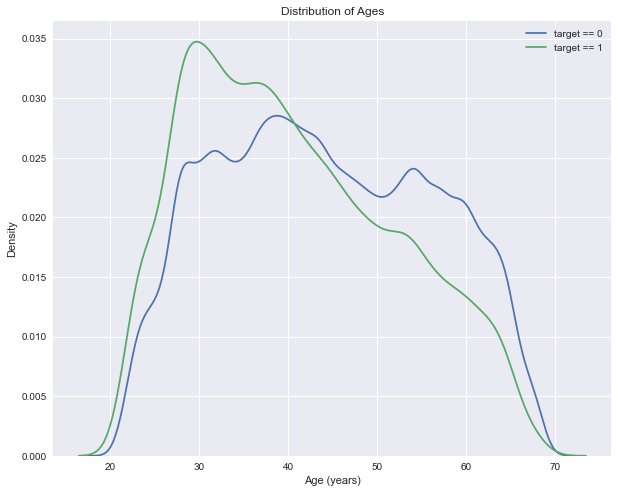

In [8]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(lite_df.loc[lite_df['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(lite_df.loc[lite_df['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')
plt.legend()

# Labeling of plot
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Distribution of Ages');

La courbe de la cible == 1 penche vers l'extrémité la plus jeune de la fourchette. Bien qu'il ne s'agisse pas d'une corrélation significative (coefficient de corrélation de -0,07), cette variable sera probablement utile dans un modèle d'apprentissage automatique car elle affecte la cible. Examinons cette relation d'une autre manière : l'échec moyen du remboursement des prêts par tranche d'âge.

Pour réaliser ce graphique, nous découpons d'abord la catégorie d'âge en tranches de 5 ans chacune. Ensuite, pour chaque bac, nous calculons la valeur moyenne de la cible, qui nous indique le ratio de prêts non remboursés dans chaque catégorie d'âge.

In [9]:
# Age information into a separate dataframe
age_data = lite_df[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [10]:
age_groups = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111442,10155.219690,27.822520
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089416,13707.908041,37.555912
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055316,20984.285455,57.491193
"(60.0, 65.0]",0.052737,22780.547460,62.412459


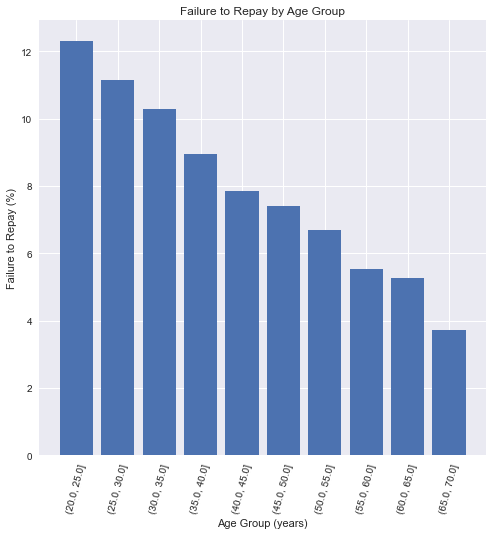

In [11]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

There is a clear trend: younger applicants are more likely to not repay the loan! 
The rate of failure to repay is above 10% for the youngest three age groups and beolow 5% for the oldest age group.

This is information that could be directly used by the bank: because younger clients are less likely to repay the loan, maybe they should be provided with more guidance or financial planning tips. This does not mean the bank should discriminate against younger clients, but it would be smart to take precautionary measures to help younger clients pay on time.

## Exteriors source

- Les 3 variables présentant les corrélations négatives les plus fortes avec la cible sont EXT_SOURCE_1, EXT_SOURCE_2 et EXT_SOURCE_3. Selon la documentation, ces caractéristiques représentent un **"score normalisé provenant d'une source de données externe"**.
- Il peut s'agir d'une sorte de **notation* cumulative réalisée à partir de nombreuses sources de données.
- Nous pouvons montrer les corrélations des caractéristiques EXT_SOURCE avec TARGET et entre elles.

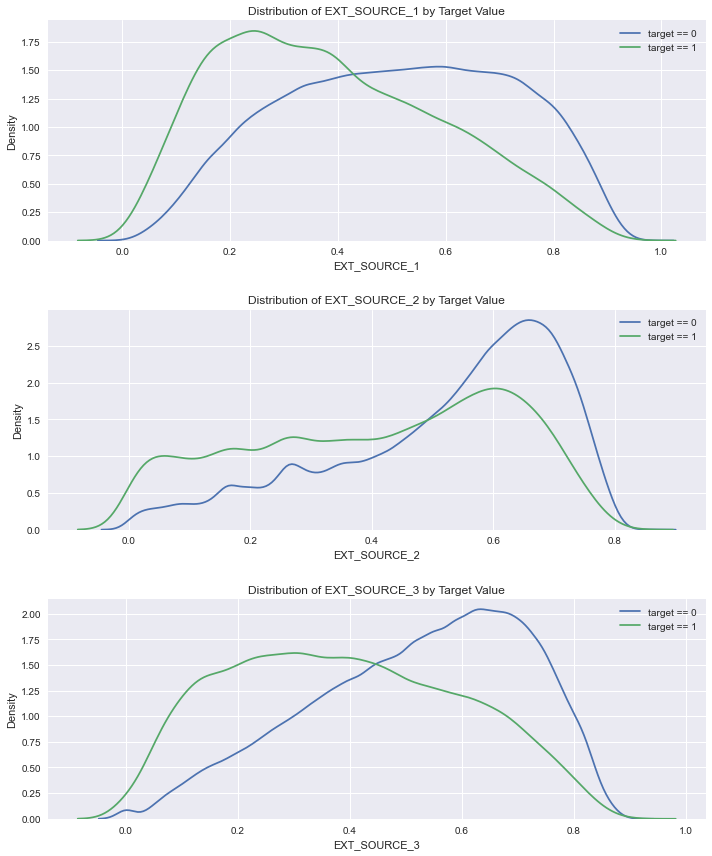

In [12]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(lite_df.loc[lite_df['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(lite_df.loc[lite_df['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    plt.legend()
plt.tight_layout(h_pad = 2.5)

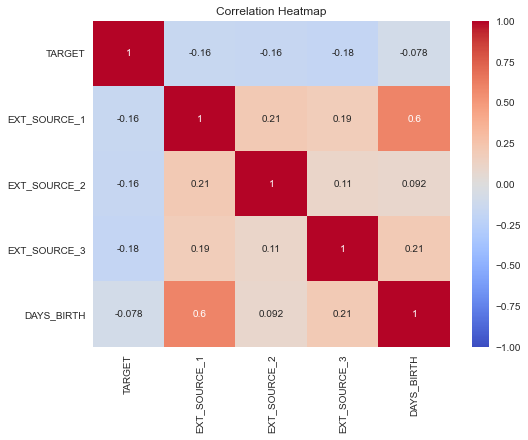

In [13]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = lite_df[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()

plt.figure(figsize = (8, 6))
# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = 'coolwarm', vmin = -1, annot = True, vmax = 1.0)
plt.title('Correlation Heatmap');

- Les trois caractéristiques EXT_SOURCE ont des corrélations négatives avec la cible, ce qui indique **que plus la valeur de l'EXT_SOURCE augmente, plus le client est susceptible de rembourser le prêt**.
- Nous pouvons également voir que **DAYS_BIRTH est positivement corrélé avec EXT_SOURCE_1**, ce qui indique que l'un des facteurs de ce score est peut-être l'âge du client.

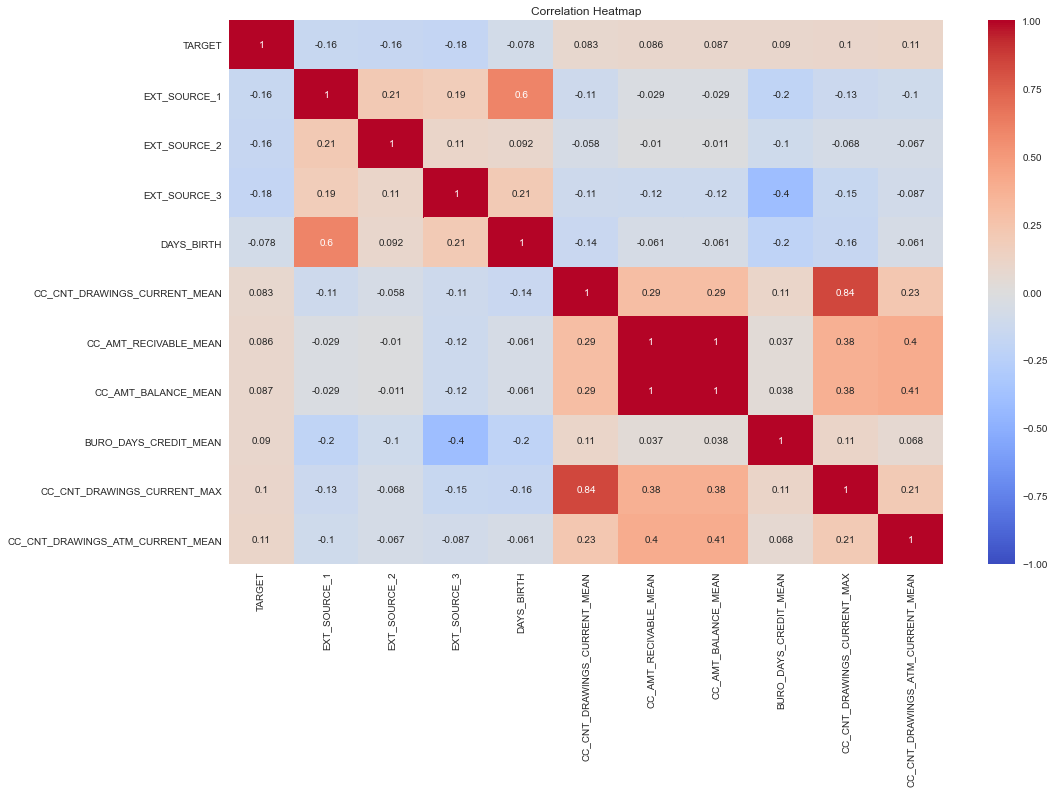

In [14]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = lite_df[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', "CC_CNT_DRAWINGS_CURRENT_MEAN",
                    "CC_AMT_RECIVABLE_MEAN", "CC_AMT_BALANCE_MEAN", "BURO_DAYS_CREDIT_MEAN", "CC_CNT_DRAWINGS_CURRENT_MAX",
                    "CC_CNT_DRAWINGS_ATM_CURRENT_MEAN"]]
ext_data_corrs = ext_data.corr()

plt.figure(figsize = (16, 10))
# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = 'coolwarm', vmin = -1, annot = True, vmax = 1.0)
plt.title('Correlation Heatmap');

- DAYS_BIRTH et EXT SOURCE 1 coréllés à 60% comme vu précédemment
- BURO DAYS CREDIT MEAN avec EXT SOURCE 3 très décorellés
- CC AMT RECIVABLE MEAN = CC AMT BALANCE MEAN


# PairPlot
Nous utilisons ici la bibliothèque de visualisation seaborn et la fonction PairGrid pour créer un diagramme de paires avec des **nuages de points** sur le triangle supérieur, des **histogrammes** sur la diagonale et des **diagrammes de densité de noyau 2D** et des coefficients de corrélation sur le triangle inférieur.

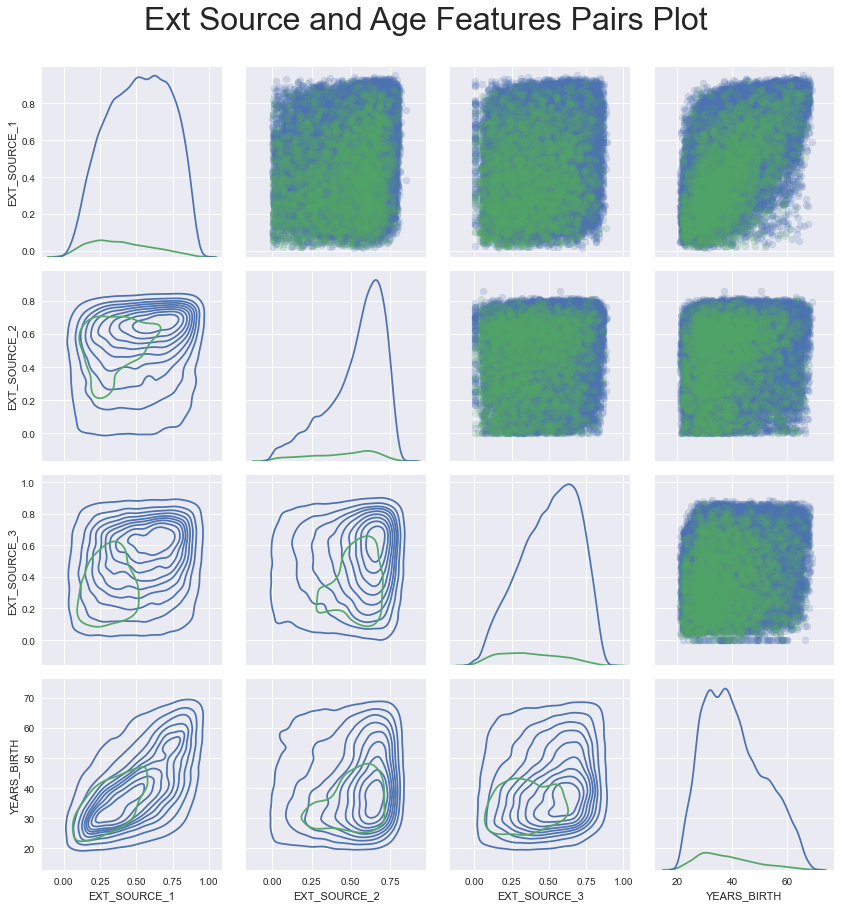

In [15]:
# Copy the data for plotting
# plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()

plot_data = ext_data[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'TARGET']]

# Add in the age of the client in years
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Drop na values and limit to first 100000 rows
plot_data = plot_data.dropna().loc[:100000, :]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05);

- Dans ce graphique, le **rouge** indique les **prêts qui n'ont pas été remboursés** et le **bleu les prêts qui sont payés**.
- Il semble y avoir une relation linéaire positive modérée entre l'**EXT_SOURCE_1** et le DAYS_BIRTH (ou équivalent YEARS_BIRTH), ce qui indique que cette caractéristique peut prendre en compte **l'âge du client.**